<a href="https://colab.research.google.com/github/Goncalotramps/fisica2_lab/blob/main/tratamento_calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

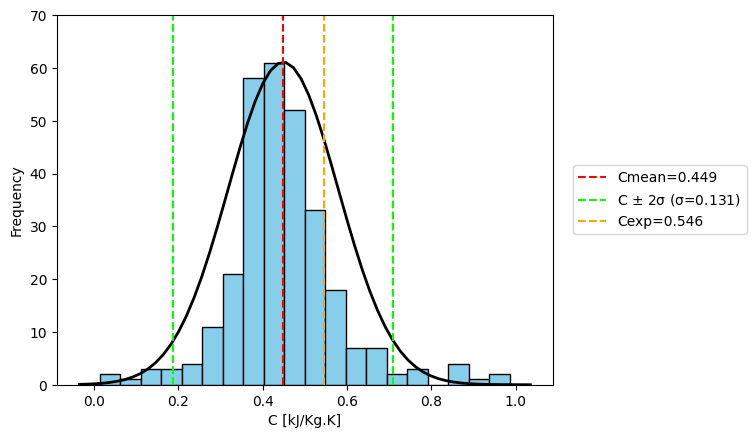

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from scipy.stats import norm
import statistics

# Intitular o ficheiro excel com os valores do calor específico com "tratamento_estatistico" e
# dar upload ao ficheiro no ícone da pasta do lado esquerdo

df = pd.read_excel('tratamento_estatistico.xlsx')

# Obter os valores do calor especifico
data = df["calor especifico"]

data= data[np.isfinite(data)]

# Faz o plot dos histogramas. O número de bins deve ser mudado para o que se achar mais adequado.

plt.hist(data, bins=20, color='skyblue', edgecolor='black')

#Cexp corresponde ao valor experimental obtido pelo próprio grupo, e deve ser introduzido aqui pelo mesmo.
#Atenção: o valor colocado trata-se apenas dum valor ficticio

Cexp=0.546

#Colocar o número de sigmas (n) para criar um intervalo de confiança no plot
n=2

#Calcula o valor médio (mu) e desvio padrão (std) dos dados
mu, std = norm.fit(data)


# Plot da distribuição normal utilizando o valor médio (mu) e o desvio padrão (std)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 60)
p = norm.pdf(x, mu, std)

ajuste=20

plt.plot(x, p*ajuste, 'k', linewidth=2)
#O valor de ajuste serve apenas para melhorar a visualização da distribuição normal no plot.

#Ajustar o valor do limite superior do eixo vertical para limsup.
limsup=70

#Plot duma linha vertical que identifica o valor médio obtido para os dados.

plt.plot([mu,mu],[0,limsup],ls="--",c="red",label="Cmean={:.3f}".format(mu))

#Dependendo se o aluno colocou 1 sigma ou mais sigmas a legenda do plot irá mudar.
if n==1:
  labelsigma="C $\pm$ \u03C3 (\u03C3={:.3f})".format(std)
else:
  labelsigma="C $\pm$ {:.0f}\u03C3 (\u03C3={:.3f})".format(n,std)

plt.plot([mu-n*std,mu-n*std],[0,limsup],ls="--",c="lime",label=labelsigma)
plt.plot([mu+n*std,mu+n*std],[0,limsup],ls="--",c="lime")
plt.plot([Cexp,Cexp],[0,limsup],ls="--",c="orange",label=r"Cexp={:.3f}".format(Cexp))

plt.ylim(0,limsup)

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

# Colocar as unidades certas e os nomes das legendas mais convenientes
plt.xlabel('C [kJ/Kg.K]')
plt.ylabel('Frequency')


# Dá o plot final
plt.savefig("tratamento_dados.png")